In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
low_memory=False
df = pd.read_csv('LA.csv').set_index('date')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtempm,15244.0,70.611388,7.342503,13.00,65.00,70.00,75.00,106.00
mintempm,15244.0,56.513054,6.764928,18.00,52.00,57.00,62.00,77.00
avgtempm,15244.0,63.562254,6.390625,16.00,59.00,63.50,68.00,89.50
avgtempm_1,15244.0,63.626542,9.885656,43.00,59.00,63.50,68.00,996.00
avgtempm_2,15244.0,63.627132,9.941455,43.00,59.00,63.50,68.00,1005.00
meanhdd_3,15244.0,3.437200,9.093399,0.00,0.00,1.50,6.00,1002.18
meanhdd_1,15244.0,3.372507,4.154159,0.00,0.00,1.50,6.00,22.00
meanhdd_2,15244.0,3.374606,4.168600,0.00,0.00,1.50,6.00,48.00
meancdd_1,15244.0,1.940075,3.243770,0.00,0.00,0.00,3.00,48.00
meancdd_2,15244.0,1.937015,3.222247,0.00,0.00,0.00,3.00,24.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 02/11/78 to 11/05/19
Data columns (total 39 columns):
maxtempm                       15244 non-null int64
mintempm                       15244 non-null int64
avgtempm                       15244 non-null float64
avgtempm_1                     15244 non-null float64
avgtempm_2                     15244 non-null float64
meanhdd_3                      15244 non-null float64
meanhdd_1                      15244 non-null float64
meanhdd_2                      15244 non-null float64
meancdd_1                      15244 non-null float64
meancdd_2                      15244 non-null float64
meancdd_3                      15244 non-null float64
minPrecipitationWaterEquiv     15244 non-null float64
maxPrecipitationWaterEquiv     15244 non-null float64
meanPrecipitationWaterEquiv    15244 non-null float64
minSnowfall                    15242 non-null float64
maxSnowfall                    15242 non-null float64
meanSnowfall              

In [4]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

X = df[[col for col in df.columns if col != 'Waterlevel']]

y = df['Waterlevel']

In [10]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   12195, Training features   36
Validation instances 1525, Validation features 36
Testing instances    1524, Testing features    36


In [12]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [13]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[20, 20],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a49b6ae90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=20): # 260 is used as we have approx 570 dataset for training
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [22]:
evaluations = []
STEPS = 20
for i in range(40):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 580 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 2.263857, step = 580
INFO:tensorflow:Saving checkpoints for 600 into tf_wx_model/model.ckpt.
INFO:tensorflo

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 620 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 0.8196808, step = 620
INFO:tensorflow:Saving checkpoints for 640 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1.8605301.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=Fal

INFO:tensorflow:Saving checkpoints for 660 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 1.4047999, step = 660
INFO:tensorflow:Saving checkpoints for 680 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 2.4001172.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-15T15:30:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-680
INFO:tensorflow:Running local_in

NanLossDuringTrainingError: NaN loss during training.

In [22]:
evaluations[0]

{'average_loss': 60.79368,
 'label/mean': 1.7300062,
 'loss': 60.86932,
 'prediction/mean': 6.9116273,
 'global_step': 10}

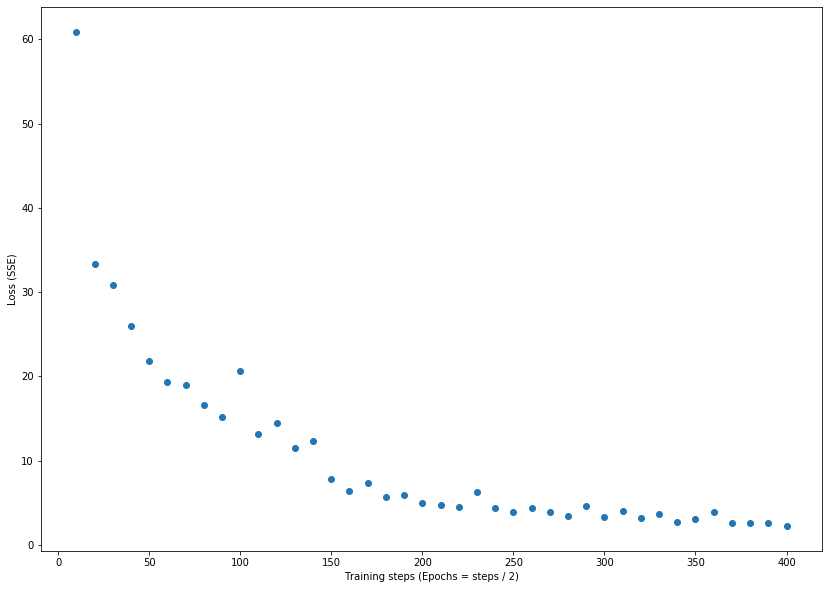

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [24]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f " % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: -2.59
The Mean Absolute Error: 1.19 
The Median Absolute Error: 1.00 
